In [1]:
import numpy             as np
import pandas            as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import lux
import prince
from scipy import stats
from datetime import date
from datetime import datetime
from datetime import timedelta
import plotly.express as px

### Lectura dela base de datos 

In [2]:
url_carpeta='C:/Users/Bluetab/Documents/Universidad/Archivos 2doSemestre/Visualizacion/'
url=url_carpeta+'application_record.csv'
df = pd.read_csv(url)
df_dash = pd.read_csv(url)
df2= pd.read_csv(url_carpeta+'credit_record.csv')


# url='application_record.csv'
# df = pd.read_csv(url)
# df2= pd.read_csv('credit_record.csv')

In [3]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
df3 = df2[df2.ID.isin(df.ID.unique())]

In [5]:
df3

,ID,MONTHS_BALANCE,STATUS
92938,5008804,0,C
92939,5008804,-1,C
92940,5008804,-2,C
92941,5008804,-3,C
92942,5008804,-4,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [6]:
df3.pivot('ID','MONTHS_BALANCE',values='STATUS')

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,
5008804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,C
5008805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,C
5008806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,X,C,C,C,C,C,C,C
5008808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,X,X,0,X,0
5008809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,C


### Cambiar nombre de las columnas

In [7]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [8]:
renombrar = {'CODE_GENDER': 'GENERO',
            'FLAG_OWN_CAR': 'VEHICULO',
            'FLAG_OWN_REALTY': 'PROPIEDADES',
            'CNT_CHILDREN': 'CANT_HIJOS',
            'AMT_INCOME_TOTAL': 'ING_TOTAL_ANUAL',
            'NAME_INCOME_TYPE': 'ORIGEN_INGRESO',
            'NAME_EDUCATION_TYPE': 'NIV_ESTUDIO',
            'NAME_FAMILY_STATUS':  'ESTADO_CIVIL',
            'NAME_HOUSING_TYPE': 'T_VIVIENDA',
            'DAYS_BIRTH' : 'FECHA_NACIMIENTO',
            'DAYS_EMPLOYED': 'EMPLEADO',
            'FLAG_MOBIL': 'TIENE_CEL',
            'FLAG_WORK_PHONE': 'TIENE_TEL_TRJ',
            'FLAG_PHONE': 'TIENE_TELFIJO',
            'FLAG_EMAIL': 'TIENE_EMAIL',
            'OCCUPATION_TYPE':'T_OCUPACION',
            'CNT_FAM_MEMBERS': 'CANT_FAM'
           }
df.columns = [renombrar.get(x, x) for x in df.columns] 
df_dash.columns = [renombrar.get(x, x) for x in df.columns] 


In [9]:
df.head()

,ID,GENERO,VEHICULO,PROPIEDADES,CANT_HIJOS,ING_TOTAL_ANUAL,ORIGEN_INGRESO,NIV_ESTUDIO,ESTADO_CIVIL,T_VIVIENDA,FECHA_NACIMIENTO,EMPLEADO,TIENE_CEL,TIENE_TEL_TRJ,TIENE_TELFIJO,TIENE_EMAIL,T_OCUPACION,CANT_FAM
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


### Arreglar datos.

In [10]:
renombrar_ori_ingreso = {'Working': 'Trabajador',
            'Commercial associate': 'Asociado comercial',
            'Pensioner': 'Pensionado',
            'State servant': 'Servidor publico',
            'Student': 'Estudiante'
           }
renombrar_niv_estudio = {'Higher education': 'Educación superior',
            'Secondary / secondary special': 'Especial secundario/secundario',
            'Incomplete higher': 'Superior incompleto',
            'Lower secondary': 'Secundaria inferior',
            'Academic degree': 'Grado académico'
           }
renombrar_estado_civil = {'Civil marriage': 'Matrimonio civil',
            'Married': 'Casado',
            'Single / not married': 'Soltero',
            'Separated': 'Separado',
            'Widow': 'Viudo'
           }
renombrar_vivienda = {'Rented apartment': 'Apartamento alquilado',
            'House / apartment': 'Casa/apartamento',
            'Municipal apartment': 'Piso municipal',
            'Co-op apartment': 'Apt compartido',
            'Office apartment': 'Apartamento oficina',
            'With parents': 'Con padres'
           }
renombrar_ocupacion = {'Security staff': 'Personal de seguridad',
            'Sales staff': 'Personal de ventas',
            'Accountants': 'Contadores',
            'Laborers': 'Trabajadores',
            'Managers': 'Gerentes',
            'Drivers': 'Conductores',
            'Core staff': 'Personal básico',
            'High skill tech staff':  'Personal de alta tecnología de alta cualificación',
            'Cleaning staff': 'Personal de limpieza',
            'Private service staff' : 'Personal de servicio privado',
            'Cooking staff': 'Personal de cocina',
            'Low-skill Laborers': 'Trabajadores de baja cualificación',
            'Medicine staff': 'Personal de medicina',
            'Secretaries': 'Secretarios',
            'Waiters/barmen staff': 'Camareros',
            'HR staff':'Personal de recursos humanos',
            'Realty agents': 'Agentes de bienes raíces',
            'IT staff': 'Personal de TI'
           }
df.ORIGEN_INGRESO = [renombrar_ori_ingreso.get(x, x) for x in df.ORIGEN_INGRESO]
df.NIV_ESTUDIO = [renombrar_niv_estudio.get(x, x) for x in df.NIV_ESTUDIO] 
df.ESTADO_CIVIL = [renombrar_estado_civil.get(x, x) for x in df.ESTADO_CIVIL] 
df.T_VIVIENDA = [renombrar_vivienda.get(x, x) for x in df.T_VIVIENDA] 
df.T_OCUPACION = [renombrar_ocupacion.get(x, x) for x in df.T_OCUPACION] 

df_dash.ORIGEN_INGRESO = [renombrar_ori_ingreso.get(x, x) for x in df.ORIGEN_INGRESO]
df_dash.NIV_ESTUDIO = [renombrar_niv_estudio.get(x, x) for x in df.NIV_ESTUDIO] 
df_dash.ESTADO_CIVIL = [renombrar_estado_civil.get(x, x) for x in df.ESTADO_CIVIL] 
df_dash.T_VIVIENDA = [renombrar_vivienda.get(x, x) for x in df.T_VIVIENDA] 
df_dash.T_OCUPACION = [renombrar_ocupacion.get(x, x) for x in df.T_OCUPACION] 

In [11]:
fecha_final = datetime(2020,1, 1)
df.FECHA_NACIMIENTO = [fecha_final - timedelta(days=-(n)) for n in df.FECHA_NACIMIENTO]
df_dash.FECHA_NACIMIENTO = [fecha_final - timedelta(days=-(n)) for n in df_dash.FECHA_NACIMIENTO]
df.GENERO = [1 if n=='F' else 0 for n in df.GENERO]
df.VEHICULO = [1 if n=='Y' else 0 for n in df.VEHICULO]
df.PROPIEDADES = [1 if n=='Y' else 0 for n in df.PROPIEDADES]
df.EMPLEADO = [8280 if n==365243 else n for n in df.EMPLEADO]

In [12]:
df

,ID,GENERO,VEHICULO,PROPIEDADES,CANT_HIJOS,ING_TOTAL_ANUAL,ORIGEN_INGRESO,NIV_ESTUDIO,ESTADO_CIVIL,T_VIVIENDA,FECHA_NACIMIENTO,EMPLEADO,TIENE_CEL,TIENE_TEL_TRJ,TIENE_TELFIJO,TIENE_EMAIL,T_OCUPACION,CANT_FAM
0,5008804,0,1,1,0,427500.0,Trabajador,Educación superior,Matrimonio civil,Apartamento alquilado,1987-02-18,-4542,1,1,0,0,NaN,2.0
1,5008805,0,1,1,0,427500.0,Trabajador,Educación superior,Matrimonio civil,Apartamento alquilado,1987-02-18,-4542,1,1,0,0,NaN,2.0
2,5008806,0,1,1,0,112500.0,Trabajador,Especial secundario/secundario,Casado,Casa/apartamento,1961-03-17,-1134,1,0,0,0,Personal de seguridad,2.0
3,5008808,1,0,1,0,270000.0,Asociado comercial,Especial secundario/secundario,Soltero,Casa/apartamento,1967-09-06,-3051,1,0,1,1,Personal de ventas,1.0
4,5008809,1,0,1,0,270000.0,Asociado comercial,Especial secundario/secundario,Soltero,Casa/apartamento,1967-09-06,-3051,1,0,1,1,Personal de ventas,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,0,1,0,135000.0,Pensionado,Especial secundario/secundario,Separado,Casa/apartamento,1957-10-21,8280,1,0,0,0,NaN,1.0
438553,6840222,1,0,0,0,103500.0,Trabajador,Especial secundario/secundario,Soltero,Casa/apartamento,1976-05-12,-3007,1,0,0,0,Trabajadores,1.0
438554,6841878,1,0,0,0,54000.0,Asociado comercial,Educación superior,Soltero,Con padres,1997-08-20,-372,1,1,0,0,Personal de ventas,1.0
438555,6842765,1,0,1,0,72000.0,Pensionado,Especial secundario/secundario,Casado,Casa/apartamento,1960-08-30,8280,1,0,0,0,NaN,2.0


In [13]:
df.describe().round(2)

,ID,GENERO,VEHICULO,PROPIEDADES,CANT_HIJOS,ING_TOTAL_ANUAL,EMPLEADO,TIENE_CEL,TIENE_TEL_TRJ,TIENE_TELFIJO,TIENE_EMAIL,CANT_FAM
count,438557.00,438557.00,438557.00,438557.00,438557.00,438557.00,438557.00,438557.0,438557.00,438557.00,438557.00,438557.00
mean,6022176.27,0.67,0.37,0.69,0.43,187524.29,-750.28,1.0,0.21,0.29,0.11,2.19
std,571637.02,0.47,0.48,0.46,0.72,110086.85,4656.22,0.0,0.40,0.45,0.31,0.90
min,5008804.00,0.00,0.00,0.00,0.00,26100.00,-17531.00,1.0,0.00,0.00,0.00,1.00
25%,5609375.00,0.00,0.00,0.00,0.00,121500.00,-3103.00,1.0,0.00,0.00,0.00,2.00
50%,6047745.00,1.00,0.00,1.00,0.00,160780.50,-1467.00,1.0,0.00,0.00,0.00,2.00
75%,6456971.00,1.00,1.00,1.00,1.00,225000.00,-371.00,1.0,0.00,1.00,0.00,3.00
max,7999952.00,1.00,1.00,1.00,19.00,6750000.00,8280.00,1.0,1.00,1.00,1.00,20.00


In [14]:
pensionados = df[df['EMPLEADO']==365243.00]['FECHA_NACIMIENTO'].unique()

C:\Users\Bluetab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EMPLEADO'>

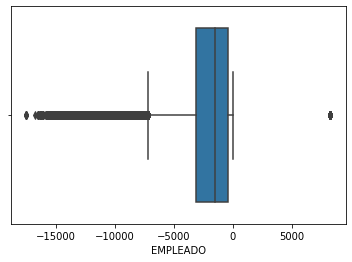

In [15]:
sns.boxplot(df['EMPLEADO'])

In [16]:
df.dtypes

ID                           int64
GENERO                       int64
VEHICULO                     int64
PROPIEDADES                  int64
CANT_HIJOS                   int64
ING_TOTAL_ANUAL            float64
ORIGEN_INGRESO              object
NIV_ESTUDIO                 object
ESTADO_CIVIL                object
T_VIVIENDA                  object
FECHA_NACIMIENTO    datetime64[ns]
EMPLEADO                     int64
TIENE_CEL                    int64
TIENE_TEL_TRJ                int64
TIENE_TELFIJO                int64
TIENE_EMAIL                  int64
T_OCUPACION                 object
CANT_FAM                   float64
dtype: object

In [17]:
## SE ELEMINA ESTA COLUMNA DEL DATAFRAME YA QUE TIENE EL MISMO VALOR EN TODAS SUS FILAS,
## DE MANERA QUE NO REPRESANTE CARACTERIZACION ALGUNA 
del(df['TIENE_CEL'])

In [18]:
df
df1 = pd.DataFrame(data = df
             , columns = ['GENERO','VEHICULO','PROPIEDADES', 'ORIGEN_INGRESO', 'NIV_ESTUDIO', 'ESTADO_CIVIL',
       'T_VIVIENDA', 'T_OCUPACION'])

In [19]:
mca = prince.MCA(
    n_components=4,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto')
mca = mca.fit(df1)

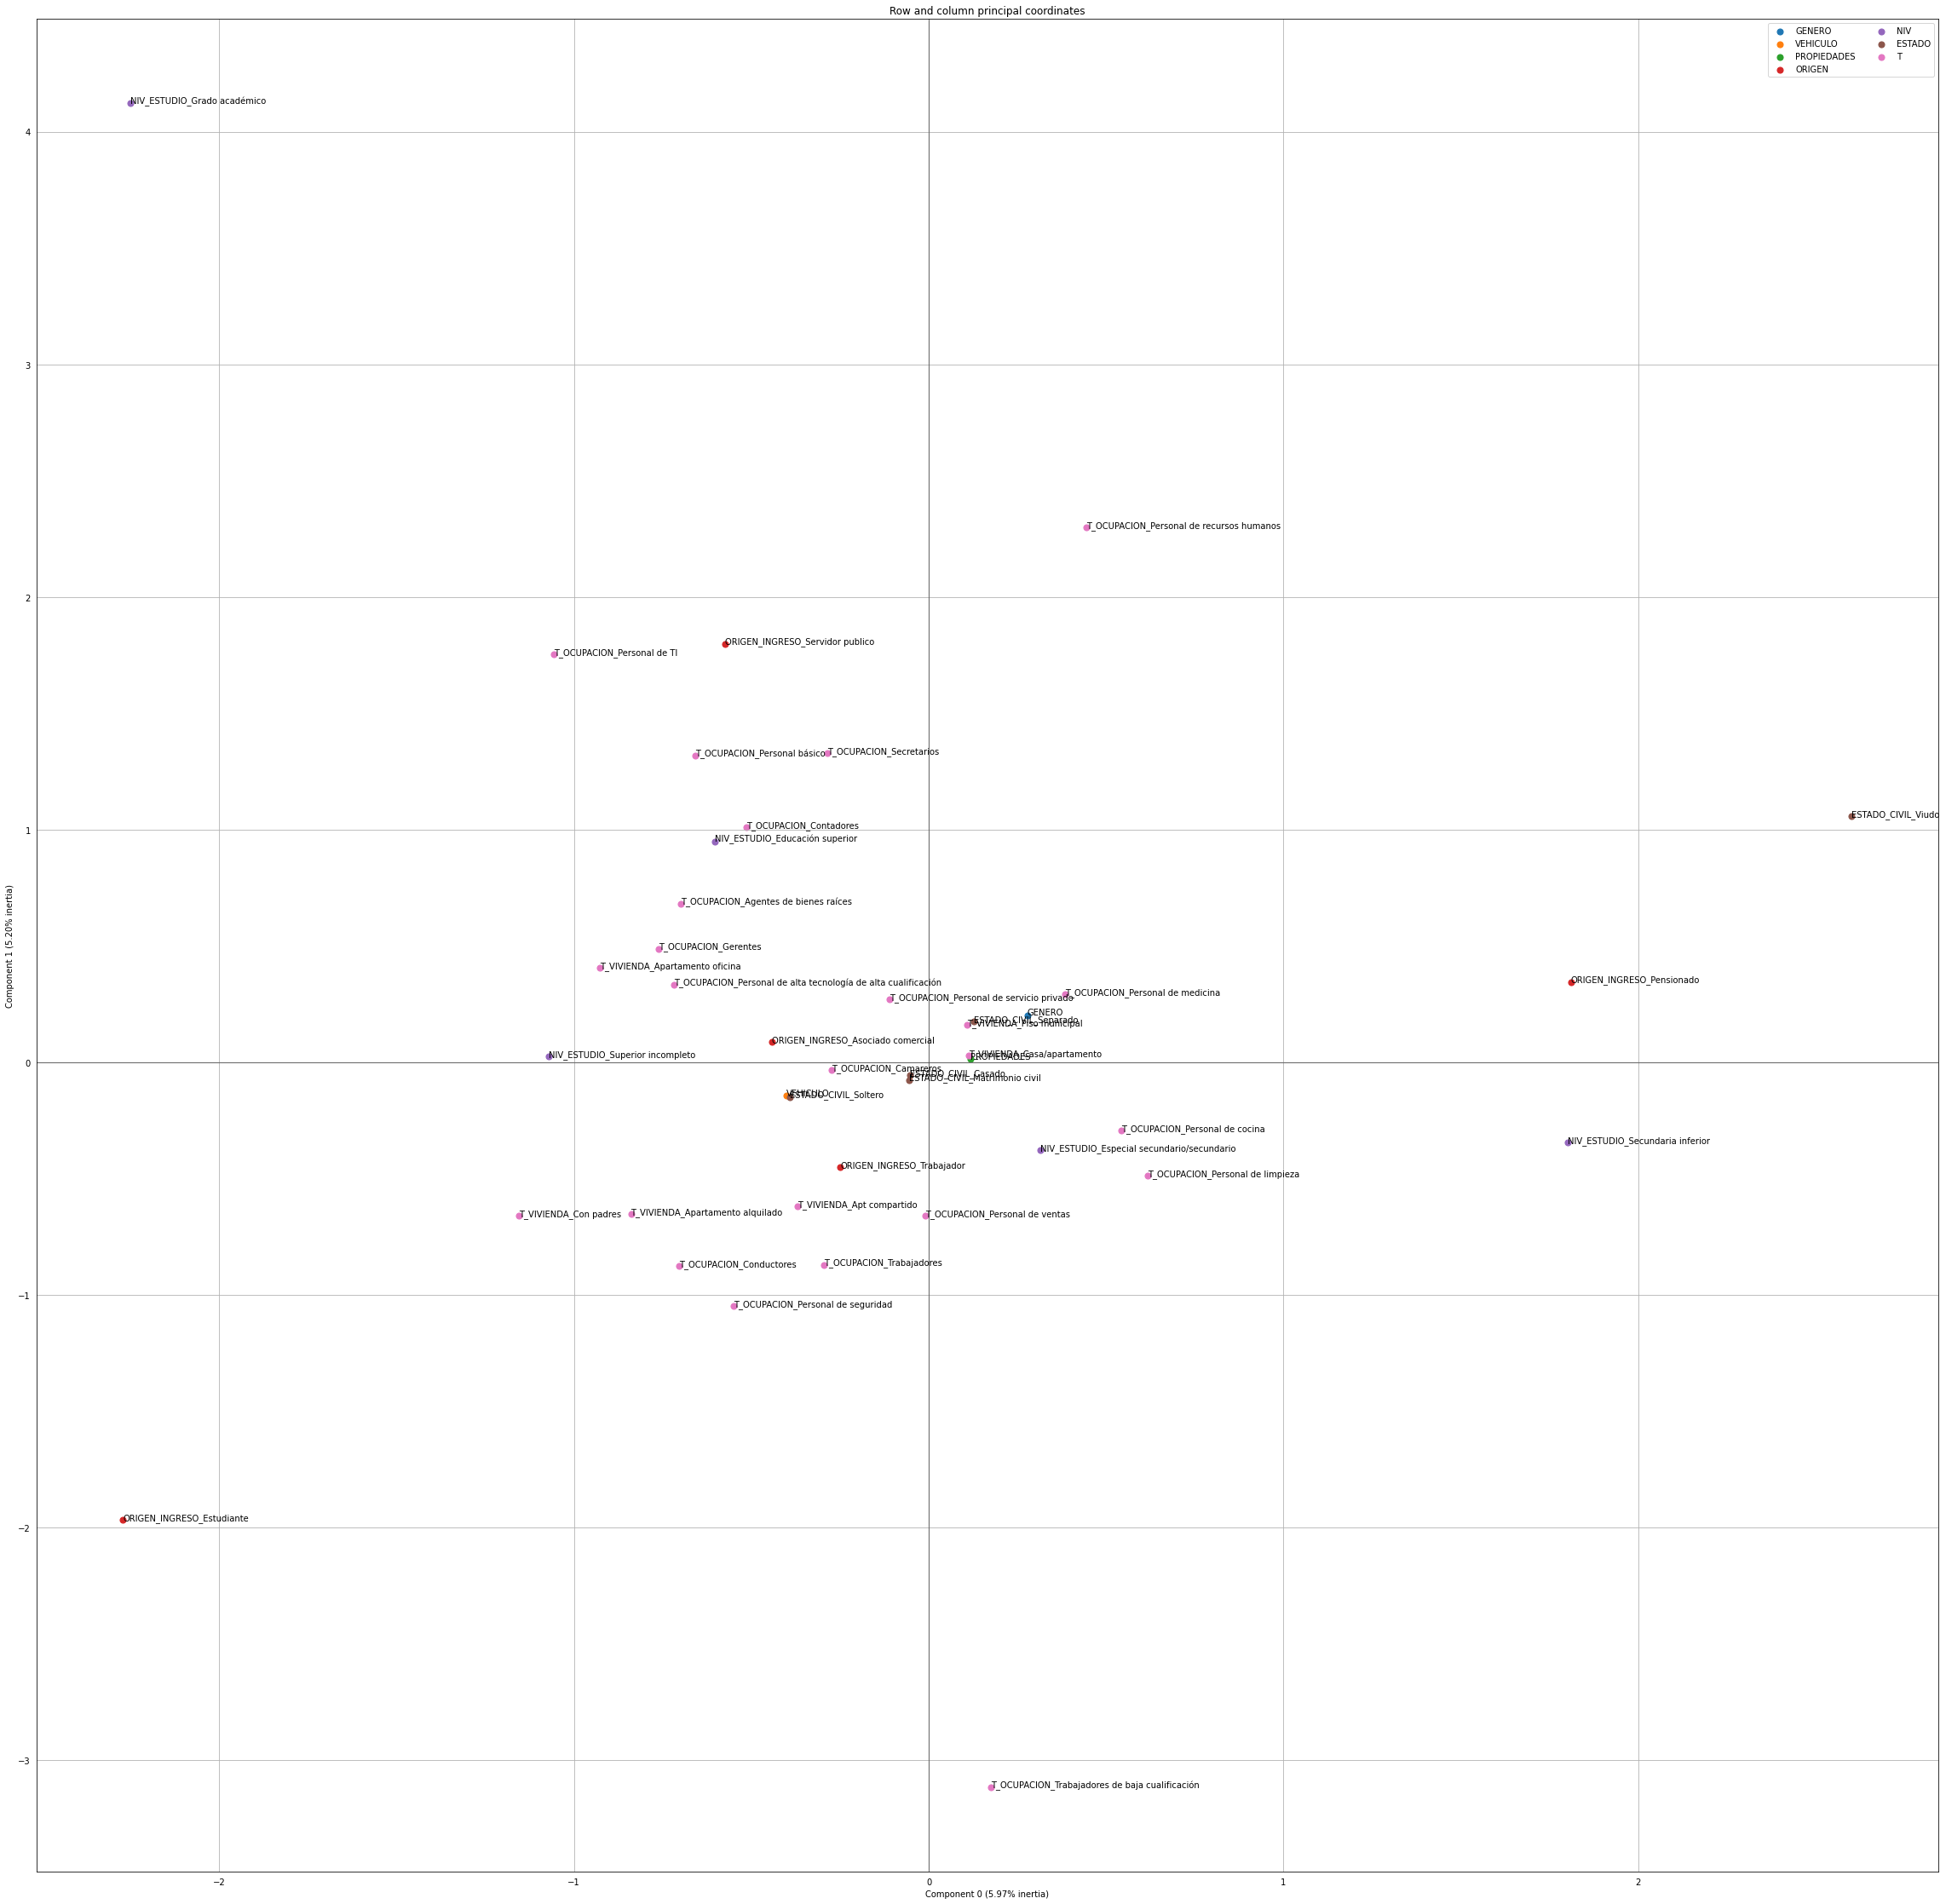

In [20]:
ax = mca.plot_coordinates(
    X=df1,
    ax=None,
    x_component=0,
    y_component=1,
    figsize=(40, 40),
    show_row_points=False,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=50,
    show_column_labels=True,
    legend_n_cols=2)

In [21]:
mca.explained_inertia_

[0.05965681410673699,
 0.05201280456114791,
 0.0440967710321917,
 0.04254338431578776]

### Correlacion

In [22]:
#fig = px.imshow(df)
#fig.show()

In [23]:
def correlacion_spearman(datos,anotacion,ancho=20,alto=15):

    cuanti=datos.select_dtypes(np.number)

    correlacion_global=datos.corr(method='spearman')


    rho,p_value = stats.spearmanr(cuanti)
    rho = list(p_value)
    for i in range(len(p_value)):
        p_value[i]= list(p_value[i])
    p_value = pd.DataFrame(p_value)
    Significancia = p_value < 0.05


    mask =np.triu(correlacion_global, k=1)

    sns.set(font_scale=1.7)
    fig, scatter = plt.subplots(figsize = (ancho,alto))
    sns.heatmap(data=correlacion_global.round(decimals=2), 
                xticklabels=correlacion_global.columns,
                yticklabels=correlacion_global.columns,
                cmap='RdBu_r',
                annot=anotacion,
                linewidth=0.5,
                mask=mask)

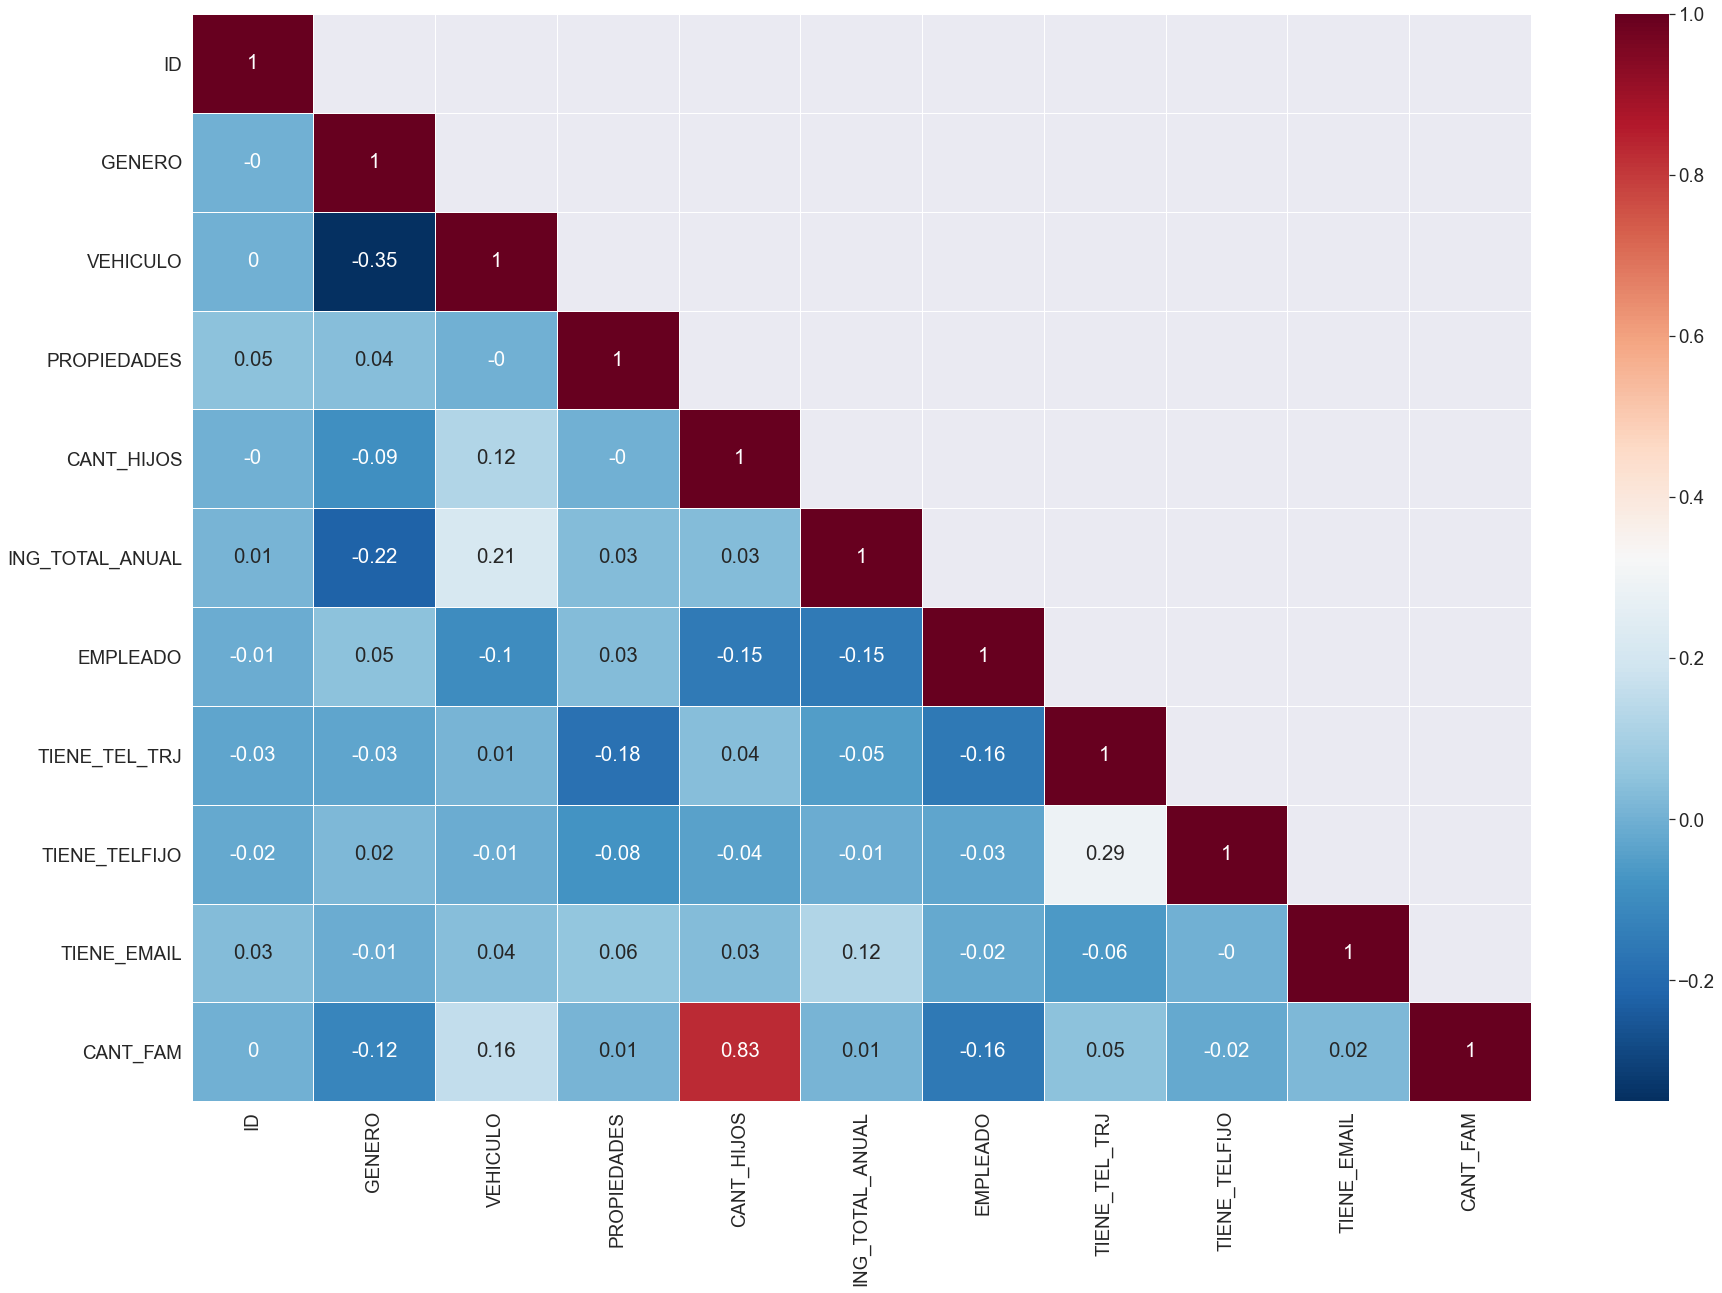

In [24]:
correlacion_spearman(df,True,30,20)

# DASH

In [25]:
dict_columns={}
dict_columns['GENERO']='GENERO: Género del cliente.'
dict_columns['VEHICULO']='VEHICULO: Indica si el cliente tiene carro propio.'
dict_columns['PROPIEDADES']='PROPIEDADES: Indica si el cliente posee bienes raíces.'
dict_columns['CANT_HIJOS']='CANT_HIJOS: Indica la cantidad de hijos del cliente.'
dict_columns['ING_TOTAL_ANUAL']='ING_TOTAL_ANUAL: Ingreso del cliente durante el año.'
dict_columns['ORIGEN_INGRESO']='ORIGEN_INGRESO: Origen de los ingresos percibidos por el cliente.'
dict_columns['NIV_ESTUDIO']='NIV_ESTUDIO: Nivel de estudio del cliente.'
dict_columns['ESTADO_CIVIL']='ESTADO_CIVIL: Estado civil del cliente.'
dict_columns['T_VIVIENDA']='T_VIVIENDA: Indica el tipo de vivienda en la cual habita el cliente.'
dict_columns['EMPLEADO']='EMPLEADO: Indica el numero de días desde que el cliente es desempleado, \
si el cliente esta desempleado el indicador seria positivo y el número mostraria los dias que \
lleva en esa situación. Ejemplo: Un Cliente con 30 indica que lleva desempleado 30 dias.'
dict_columns['TIENE_CEL']='TIENE_CEL: Indica si el cliente tiene celular.'
dict_columns['TIENE_TEL_TRJ']='TIENE_TEL_TRJ: Indica si el cliente tiene teléfono laboral.'
dict_columns['TIENE_TELFIJO']='TIENE_TELFIJO: Indica si el cliente tiene teléfono residencial.'
dict_columns['TIENE_EMAIL']='TIENE_EMAIL: Indica si el cliente tiene correo electrónico.'
dict_columns['T_OCUPACION']='T_OCUPACION: Tipo de actividad que desempeña el cliente.'
dict_columns['CANT_FAM']='CANT_FAM: Cantidad de miembros del nucleo familiar del cliente.'
dict_columns['MONTHS_BALANCE']='MONTHS_BALANCE: Antiguedad del reporte de la categoria de habito de pago \
generada para el cliente. Por ejemplo si el valor es -2 significa \
que hace referencia a la calificacion del cliente dos meses antes del mes actual'
dict_columns['STATUS']='STATUS: Categoría de hábito de pago del cliente:\
 0: 1-29 días atrasados.                                            \
 1: 30-59 días atrasados.                                           \
 2: 60-89 días atrasados.                                           \
 3: 90-119 días atrasados.                                           \
 4: 120-149 días atrasados.                                           \
 5: Deudas vencidas o incobrables, cancelaciones por más de 150 días.                                                                 \
 C: Cancelado ese mes.                                            \
 X: Sin préstamo durante el mes.'


In [112]:
from jupyter_dash import JupyterDash
import plotly_express as px
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from plotly import graph_objs as go
import dash_table
import plotly.figure_factory as ff
import matplotlib
import dash_bootstrap_components as dbc
url='https://www.crisfe.com/wp-content/uploads/2018/08/logo-universidad-central_crisfe.png'

rgb_colors = {}
for name, hex in matplotlib.colors.cnames.items():
    rgb_colors[name] = matplotlib.colors.to_hex(hex)

try:
    del(df_dash['TIENE_CEL'])
except:
    print('n')
# cuanti=df.select_dtypes(np.number)
# cuanti.columns
# corr=np.array(df.corr(method='spearman').round(decimals=2))
# fig1 = ff.create_annotated_heatmap(corr,colorscale='Viridis',x=list(cuanti.columns),y=list(cuanti.columns))

df3['count']=1
df_g=df_dash.groupby(['GENERO','NIV_ESTUDIO'])['ING_TOTAL_ANUAL'].mean('ING_TOTAL_ANUAL').reset_index()
fig1 = px.sunburst(df_g, path=['NIV_ESTUDIO','GENERO'], values='ING_TOTAL_ANUAL')
# fig.show()
df5=df3.groupby(['STATUS','MONTHS_BALANCE'])['MONTHS_BALANCE'].count().reset_index(name = 'count')
fig2=px.histogram(df5,x=['STATUS'],y='count',title='STATUS',labels={'value':'Categoría de hábito de pago'})
# fig2 = px.histogram(df3,y='MONTHS_BALANCE',x='STATUS',category_orders={'STATUS':['X','C', '0', '1',  '2', '3', '4', '5']})


colors = {'background': '#111111',
    'text': '#7FDBFF',
    'rojo':'#FF1411',
    'negro': '#111111'}

pie=html.Div([ html.Div([html.Div(
        html.H1(children='Integrantes',
           style={
            'textAlign': 'center',
            'backgroundColor': rgb_colors['steelblue'],
            'background-size': '300px 300px', 
            'color': rgb_colors['white'], 'marginTop':100,'marginBottom': 10}),style={'display': 'block','margintop':350})
    ,
    html.Div( html.Img(src=url,style={'height':'10%', 'width':'10%'}),style={'margintop':350})])],
              className="row")




tabc_1=[html.Div([
                    dbc.Row( html.H2(children='Pregunta Problema'))
    ,
                    dbc.Row(html.P("¿Cómo predecir el nivel de riesgo crediticio de un \
                                cliente al momento en que solicita una tarjeta de crédito con el Banco?" ))
    ,
                    dbc.Row( html.H2(children='Objetivo General'))
    ,
                    dbc.Row( html.P("Identificar el riesgo crediticio de los clientes para aprobar o negar \
                                    una tarjeta de crédito del Banco, y así poder tener una cartera de clientes más sana."))
    ,
                    dbc.Row(html.H2(children='Objetivos específicos'))
    ,
                    dbc.Row( html.P("Implementar una mejor segmentación de los clientes con un \
                                modelo más preciso, que permita calcular la probabilidad de que \
                                un cliente cumpla o incumpla con sus obligaciones financieras."))
#     ,
#                     dbc.Row(html.H1(children='Integrantes',
#                                         className="row",
#                                        style={
#                                         'textAlign': 'center',
#                                         'backgroundColor': rgb_colors['steelblue'],
#                                         'background-size': '300px 300px', 
#                                         'color': rgb_colors['white'], 'marginTop':100,'marginBottom': 10}))
#     ,
#                     dbc.Row( html.Div( html.Img(src=url,style={'height':'10%', 'width':'10%'}),style={'margintop':350}))
    
                    ])
        ]
    
         
         
         
  

 
tabc_2=[ html.Div([
        html.Div([
          dcc.Dropdown(id='variable', 
                    options=[{'label': i, 'value': i} for i in df.columns.drop(['ID','FECHA_NACIMIENTO'])],
                    value='GENERO',
                    placeholder="Select ",
                    multi=False,
                    style={'width': '250px','display': "block",'marginTop': 20, 'marginBottom': 10}
                      ) 
            ,
            html.P(children='',id='Descripcion_roll',style={'width': '250px','display': 'block'})
                ],style={"margin-left": "20px",'display': 'inline-block','float': 'left'})
        ,
        
     html.Div([
      dcc.Graph(figure=fig1,id='histo_1',style={'border':'2px black solid',"margin-right": "20px",'marginBottom': 10,'marginTop': 20,'width': '600px','display': 'inline-block','float': 'right'}),
      dcc.Graph(id='histo_2',style={'border':'2px black solid','marginBottom': 10,'marginTop': 20,"margin-right": "20px",'width': '600px','display': 'inline-block','float': 'center'})
      ],style={'display': 'inline-block','float': 'right'})    
    ],style={'display': 'block'})
]




tabc_3=[html.Div([
   
        html.Div([
          dcc.Dropdown(id='variable_2', 
                    options=[{'label': i, 'value': i} for i in df3.columns.drop(['ID','count'])],
                    value='STATUS',
                    placeholder="Select ",
                    multi=False,
                    style={'width': '250px','display': "block",'marginTop': 20, 'marginBottom': 10}
                      ) 
            , 
            html.P(children='',id='Descripcion_roll_2',style={'width': '335px','display': 'block','whiteSpace': 'pre-wrap'})
                ],style={"margin-left": "20px",'display': 'inline-block','float': 'left'})
        ,
        html.Div([
          dcc.Graph(figure=fig2,id='histo_3',style={'border':'2px black solid',"margin-right": "20px",'marginBottom': 10,'marginTop': 20,'width': '580px','display': 'inline-block','float': 'right' }),
          dcc.Graph(id='histo_4',style={'border':'2px black solid','marginBottom': 10,'marginTop': 20,"margin-right": "20px",'width': '580px','display': 'inline-block','float': 'center'})
          ],style={'display': 'inline-block','float': 'right'})    
              
    
],style={'display': 'block'})]

tabc_4_a=  html.Div([
    
    html.Div([
        html.Label('Genero',style={'width': '150px'}),
    dcc.RadioItems(id='radio_genero',options=[{'label': 'Mujer', 'value': 'F'},
                               {'label': 'Hombre', 'value': 'M'}],
                      value='F',
                      labelStyle={'display': 'inline-block'},
                      style={'width': '150px'})        
        ],style={'display': 'inline-block','border':'2px black solid','backgroundColor': rgb_colors['white'],"margin-left": "20px"}),
    
     html.Div([
        html.Label('Casa Propia',style={'width': '150px'}),
    dcc.RadioItems(id='radio_casa',options=[{'label': 'Si', 'value': '1'},
                               {'label': 'No', 'value': '0'}],
                      value='1',
                      labelStyle={'display': 'inline-block'},
                      style={'width': '100px'})        
        ],style={'display': 'inline-block','border':'2px black solid','backgroundColor': rgb_colors['white'],"margin-left": "20px"}),
    
   
     html.Div([
        html.Label('Tipo de vivienda',style={'width': '150px'}),
    dcc.RadioItems(id='radio_vivienda',options=[{'label': 'Arriendo', 'value': '1'},
                                                {'label': 'Apto municipal', 'value': '2'},
                                                {'label': 'Apto compartido', 'value': '3'},
                                                {'label': 'Apto oficina', 'value': '4'},
                                                {'label': 'Familiar', 'value': '5'},
                                                {'label': 'Propia', 'value': '6'}
                                               ],
                      value='1',
                      labelStyle={'display': 'inline-block'},
                      style={'width': '590px'})        
        ],style={'display': 'inline-block','border':'2px black solid','backgroundColor': rgb_colors['white'],"margin-left": "20px"}),
    
 html.Div([
        html.Label('Nivel Educativo',style={'width': '150px'}),
    dcc.RadioItems(id='radio_edu',options=[{'label': 'Educacion superior', 'value': '1'},
                                                {'label': 'Superior incompleto', 'value': '2'},
                                                {'label': 'Grado academico', 'value': '3'},
                                            {'label': 'Secundario inferior', 'value': '4'},
                                                {'label': 'Especial secundario/Secundario', 'value': '5'}
                                               ],
                      value='1',
                      labelStyle={'display': 'inline-block'},
                      style={'width': '620px'})        
        ],style={'display': 'inline-block','border':'2px black solid','backgroundColor': rgb_colors['white'],"margin-left": "20px"}),
    



],style={'marginTop': 20,'display': 'block'})




tabc_4_b=html.Div([
    html.Div([
     html.Div(html.Label('Número de Hijos')),
  html.Div(dcc.Slider(
        id='n_hijos',
        min=0,
        max=9,
        marks={i: '. {}'.format(i) if i == 0 else str(i) for i in range(0, 10)},
        value=1) ,style={'width': '250px'} )     
        
    ],style={'display': 'inline-block','border':'2px black solid','backgroundColor': rgb_colors['white'],"margin-left": "20px"}),

     html.Div([
     html.Div(html.Label('Número de familiares')),
  html.Div(dcc.Slider(
        id='n_familiares',
        min=0,
        max=9,
        marks={i: '. {}'.format(i) if i == 0 else str(i) for i in range(0, 10)},
        value=1) ,style={'width': '250px'} )     
        
    ],style={'display': 'inline-block','border':'2px black solid','backgroundColor': rgb_colors['white'],"margin-left": "20px"}),

    
    html.Div([
     html.Div(html.Label('Edad')),
  html.Div(dcc.Slider(
        id='n_edad',
        min=20,
        max=60,
        marks={i: ':{}'.format(i) if i == 20 else str(i) for i in range(20, 61)},
        value=1) ,style={'width': '800px'} )     
        
    ],style={'display': 'inline-block','border':'2px black solid','backgroundColor': rgb_colors['white'],"margin-left": "20px"}),

],style={'marginTop': 20,'display': 'block'})


tabc_4_c=html.Div([
     html.Div([
        html.Label('Estado Civil',style={'width': '150px'}),
    dcc.RadioItems(id='radio_e_civil',options=[{'label': 'Matrimonio civil', 'value': '1'},
                                            {'label': 'Casado', 'value': '2'},
                                            {'label': 'Soltero', 'value': '3'},
                                            {'label': 'Separado', 'value': '4'},
                                            {'label': 'Viudo', 'value': '5'}],
                      value='1',
                      labelStyle={'display': 'inline-block'},
                      style={'width': '300px'})        
        ],style={'display': 'inline-block','border':'2px black solid','backgroundColor': rgb_colors['white'],"margin-left": "20px"}),
    
    html.Div([
        html.Label('Tiene Vehiculo',style={'width': '150px'}),
    dcc.RadioItems(id='radio_t_vehiculo',options=[{'label': 'Si', 'value': '1'},
                                            {'label': 'No', 'value': '0'}
                                           ],
                      value='1',
                      labelStyle={'display': 'inline-block'},
                      style={'width': '100px'})        
        ],style={'display': 'inline-block','border':'2px black solid','backgroundColor': rgb_colors['white'],"margin-left": "20px"}),
    
    ],style={'marginTop': 20,'display': 'block'})




tabc_4=[tabc_4_a,tabc_4_b,tabc_4_c]




# Create app
# app = JupyterDash(external_stylesheets=[dbc.themes.BOOTSTRAP])
app = JupyterDash(__name__)

app.config['suppress_callback_exceptions'] = True   
# Define Layout
app.layout = dbc.Container(

 html.Div(style={'backgroundColor': rgb_colors['lightblue']}
           ,children=[ 
    html.H1(children='Predicción de riesgo para aprobación de tarjetas de crédito',
           style={
            'textAlign': 'center',
            'backgroundColor': rgb_colors['steelblue'],
               'background-size': '300px 300px', 
             'color': rgb_colors['white'], 'marginTop':20,'marginBottom': 10})
    ,

    dcc.Tabs(
        id="tabs-with-classes",
        value='tab-4',
        parent_className='custom-tabs',
        className='custom-tabs-container',
        children=[
            dcc.Tab(
                label='Descripción',
                value='tab-1',
                className='custom-tab',
                selected_className='custom-tab--selected',
                style={'backgroundColor': rgb_colors['lightseagreen'],'fontWeight': 'bold','font-size': '15pt','color': rgb_colors['white']},
                selected_style ={'backgroundColor': rgb_colors['lightsalmon'],'fontWeight': 'bold','font-size': '15pt'}
            ),
            dcc.Tab(
                label='Exploracion datos demograficos',
                value='tab-2',
                className='custom-tab',
                selected_className='custom-tab--selected',
                style={'backgroundColor': rgb_colors['lightseagreen'],'fontWeight': 'bold','font-size': '15pt','color': rgb_colors['white']},
                selected_style ={'backgroundColor': rgb_colors['lightsalmon'],'fontWeight': 'bold','font-size': '15pt'}
            ),
            dcc.Tab(
                label='Exploracion datos Habitos de Pago',
                value='tab-3', className='custom-tab',
                selected_className='custom-tab--selected',
                style={'backgroundColor': rgb_colors['lightseagreen'],'fontWeight': 'bold','font-size': '15pt','color': rgb_colors['white']},
                selected_style ={'backgroundColor': rgb_colors['lightsalmon'],'fontWeight': 'bold','font-size': '15pt'}
            ),
            dcc.Tab(
                label='Aplicativo modelo',
                value='tab-4',
                className='custom-tab',
                selected_className='custom-tab--selected',
                style ={'backgroundColor': rgb_colors['lightseagreen'],'fontWeight': 'bold','font-size': '15pt','color': rgb_colors['white']},
                selected_style ={'backgroundColor': rgb_colors['lightsalmon'],'fontWeight': 'bold','font-size': '15pt'}
            ),
        ]),
    
 
    html.Div(id='tabs-content-classes',style={'display': 'block','marginBottom': 150})   

       ,
     
   html.H1(children='Integrantes',
           className="row",
           style={'display': 'block',
            'textAlign': 'center',
            'backgroundColor': rgb_colors['steelblue'],
            'background-size': '300px 300px', 
            'color': rgb_colors['white'], 'marginTop':490,'marginBottom': 10})
]))## cierre div principal


@app.callback(Output('tabs-content-classes', 'children'),
              Input('tabs-with-classes', 'value'))
def render_content(tab):
    if tab == 'tab-1':
        return tabc_1
    elif tab == 'tab-2':
        return tabc_2
    elif tab == 'tab-3':
        return tabc_3
    elif tab == 'tab-4':
        return tabc_4


@app.callback(
    Output('histo_2','figure'),
    [Input('variable', 'value')])
def update_output(value):
    pie=['GENERO','TIENE_TEL_TRJ','TIENE_TELFIJO','TIENE_EMAIL','VEHICULO', 'PROPIEDADES','ESTADO_CIVIL','T_VIVIENDA']
    if value in pie:
        fig = px.pie(df_dash,value,title=value)
    else:
        fig = px.histogram(df_dash,x=value,title=value)
    return fig

@app.callback(
    Output('histo_4','figure'),
    [Input('variable_2', 'value')])
def update_output(value):
    pie=['STATUS']
    if value in pie:
        fig = px.pie(df3,value,title=value)
    else:
        df5=df3.groupby(['STATUS','MONTHS_BALANCE'])['MONTHS_BALANCE'].count().reset_index(name = 'count')
        fig=px.histogram(df5,x=['STATUS'],y='count',title='STATUS',labels={'value':'Categoría de hábito de pago'})
    return fig

@app.callback(
    Output('Descripcion_roll', 'children'),
    [Input('variable', 'value')])
def update_output(value):
    desc = dict_columns[value]
    return desc


@app.callback(
    Output('Descripcion_roll_2', 'children'),
    [Input('variable_2', 'value')])
def update_output(value):
    desc = dict_columns[value]
    return desc


if __name__ == '__main__':
    app.run_server(debug=True)

n
Dash app running on http://127.0.0.1:8050/


In [ ]:
df3

# df5=df3.groupby(['STATUS','MONTHS_BALANCE'])['MONTHS_BALANCE'].count().reset_index(name = 'count')
px.histogram(df5,x=['MONTHS_BALANCE'],title='STATUS',color='STATUS')
# px.sunburst(df5, path=['STATUS','MONTHS_BALANCE'], values='count')

In [ ]:
# fig2 = 

px.histogram(df3,y='count',x='STATUS',category_orders={'STATUS':['X','C', '0', '1',  '2', '3', '4', '5']})

In [ ]:
rgb_colors.keys()

In [ ]:
# from jupyter_dash import JupyterDash
# import plotly_express as px
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# from plotly import graph_objs as go
# import dash_table
# import plotly.figure_factory as ff
# try:
#     del(df_dash['TIENE_CEL'])
# except:
#     print('n')
# cuanti=df.select_dtypes(np.number)
# cuanti.columns
# corr=np.array(df.corr(method='spearman').round(decimals=2))
# fig1 = ff.create_annotated_heatmap(corr,colorscale='Viridis',x=list(cuanti.columns),y=list(cuanti.columns))



# fig2 = px.histogram(df3,y='MONTHS_BALANCE',x='STATUS',category_orders={'STATUS':['X','C', '0', '1',  '2', '3', '4', '5']})


# colors = {'background': '#111111',
#     'text': '#7FDBFF',
#     'rojo':'#FF1411',
#     'negro': '#111111'}
# app = JupyterDash(__name__)


# app.layout = html.Div([

#     html.H1(children='Predicción de riesgo para aprobación de tarjetas de crédito',
#            style={
#             'textAlign': 'center',
#             'backgroundColor': colors['negro'],
#              'color': colors['text'], 'marginTop':20,'marginBottom': 10})
#     ,
    
    
#     html.H1(children='Data Set Variables Demográficas')
#     ,
#     ### Division horizontal
#     html.Div([
#         html.Div([
#           dcc.Dropdown(id='variable', 
#                     options=[{'label': i, 'value': i} for i in df.columns.drop(['ID','FECHA_NACIMIENTO'])],
#                     value='GENERO',
#                     placeholder="Select ",
#                     multi=False,
#                     style={'width': '250px','display': "block"}
#                       ) 
#             ,
#             html.P(children='',id='Descripcion_roll',style={'display': 'block'})
#                 ],style={"margin-left": "20px",'display': 'inline-block','float': 'left'})
#         ,
        
#      html.Div([
#       dcc.Graph(figure=fig1,id='histo_1',style={'width': '600px','display': 'inline-block','float': 'right'}),
#       dcc.Graph(id='histo_2',style={'width': '600px','display': 'inline-block','float': 'center'})
#       ],style={'display': 'inline-block','float': 'right'})    
#     ],style={'display': 'block'})

#      ,
    
#     html.H1(children='Data Set Habitos de pago',style={'display': 'block', 'marginTop': 520})
#     ,
    
    
#     ### Division horizontal
#     html.Div([
#         html.Div([
#           dcc.Dropdown(id='variable_2', 
#                     options=[{'label': i, 'value': i} for i in df3.columns.drop(['ID'])],
#                     value='STATUS',
#                     placeholder="Select ",
#                     multi=False,
#                     style={'width': '250px','display': "block"}
#                       ) 
#             ,
#             html.P(children='',id='Descripcion_roll_2',style={'display': 'block'})
#                 ],style={"margin-left": "20px",'display': 'inline-block','float': 'left'})
#         ,
#         html.Div([
#           dcc.Graph(figure=fig2,id='histo_3',style={'width': '600px','display': 'inline-block','float': 'right'}),
#           dcc.Graph(id='histo_4',style={'width': '600px','display': 'inline-block','float': 'center'})
#           ],style={'display': 'inline-block','float': 'right'})    
#     ],style={'display': 'block'})

    

       
# ])## cierre div principal


# @app.callback(
#     Output('histo_2','figure'),
#     [Input('variable', 'value')])
# def update_output(value):
#     pie=['GENERO','TIENE_TEL_TRJ','TIENE_TELFIJO','TIENE_EMAIL','VEHICULO', 'PROPIEDADES','ESTADO_CIVIL','T_VIVIENDA']
#     if value in pie:
#         fig = px.pie(df_dash,value,title=value)
#     else:
#         fig = px.histogram(df_dash,x=value,title=value)
#     return fig


# @app.callback(
#     Output('histo_4','figure'),
#     [Input('variable_2', 'value')])
# def update_output(value):
#     pie=['STATUS']
#     if value in pie:
#         fig = px.pie(df3,value,title=value)
#     else:
#         fig = px.histogram(df3,x=value,title=value)
#     return fig


# @app.callback(
#     Output('Descripcion_roll', 'children'),
#     [Input('variable', 'value')])
# def update_output(value):
#     desc = dict_columns[value]
#     return desc


# @app.callback(
#     Output('Descripcion_roll_2', 'children'),
#     [Input('variable_2', 'value')])
# def update_output(value):
#     desc = dict_columns[value]
#     return desc



    
    


# if __name__ == '__main__':
#     app.run_server(debug=True)

